<a href="https://colab.research.google.com/github/narennravi/Customer-Conversion-Prediction/blob/master/Project_1__Customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Project - 1

In [ ]:
# **CUSTOMER_CONVERSION_PREDICTION**

#-----------------------------------------------------------------------------

## **Import necessary Lib**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#-----------------------------------------------------------------------------

## **Reading CSV file**

In [2]:
df = pd.read_csv('/content/train.csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


#-----------------------------------------------------------------------------

## **Checking Im-balance**

In [3]:
a = (len(df[df['y'] == 'yes']))/(df.shape[0])
b = (len(df[df['y'] == 'no']))/(df.shape[0])
print('Check for Imbalancing : ','\n'
      '% of yes :', a,'\n'
      '% of no :', b, '\n')

Check for Imbalancing :  
% of yes : 0.11698480458295547 
% of no : 0.8830151954170445 



#-----------------------------------------------------------------------------

## **DATA cleaning**

In [4]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [6]:
df.isnull().sum()

# checking for null-values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [7]:
df.drop_duplicates(inplace = True)

# If duplicates were present it gets dropped

In [8]:
df.shape

(45205, 11)

In [9]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


#-----------------------------------------------------------------------------

## AGE - column

In [10]:
df.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [11]:
df.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:>

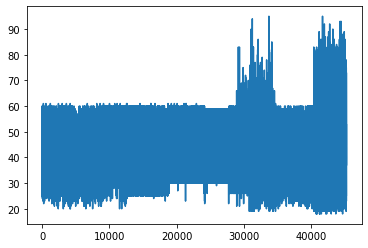

In [12]:
df.age.plot()

In [13]:
q1 = df.age.quantile(0.25)
q3 = df.age.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print('Lower thersold : ', lower,'\n'
      'Upper thersold : ', upper)
print('count of greater than 70 age : ', len(df[df['age'] > 70.5]))

# Finding lower & upper threshold for iqr
# Identify'g count of age who are greater than 70

Lower thersold :  10.5 
Upper thersold :  70.5
count of greater than 70 age :  487


In [14]:
print('Age > 70 & yes : ', len(df[(df['age'] > 70) & (df['y'] == 'yes')]))
print('Age > 70 & no : ',len(df[(df['age'] > 70) & (df['y'] == 'no')]))
print('Age < 70 & yes : ',len(df[(df['age'] < 70) & (df['y'] == 'yes')]))
print('Age < 70 & no : ',len(df[(df['age'] < 70) & (df['y'] == 'no')]))


Age > 70 & yes :  218
Age > 70 & no :  269
Age < 70 & yes :  5054
Age < 70 & no :  39597


## JOB - Column

In [15]:
df.job.value_counts()

# displays count value of different job-categories from "job-col"
# job-categories: 
#        (blue-collar, management, technician, admin, services,          
#        retired, self-employed, entrepreneur, unemployed,      
#        housemaid, student, unknown)

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [16]:
len(df[(df['job'] == 'unknown') & (df['education_qual'] == 'unknown') & (df['call_type'] == 'unknown') & (df['prev_outcome'] == 'unknown')])


54

In [17]:
df.groupby(['job', 'y'])['y'].count()

# grouping the job column & y ---> to differentiate the yes/no for imbalancing

job            y  
admin.         no     4539
               yes     631
blue-collar    no     9022
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8156
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3784
               yes     369
student        no      669
               yes     269
technician     no     6756
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: y, dtype: int64

In [18]:
df.job.unique()

# displays all the job-roles

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [19]:
for a in['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'] :
    print('%-Conversion of job-role --> ', a, ' : ', ((  (len(df[(df['job'] == a) & (df['y'] == 'yes')]))  /len(df[df['job'] == a]) )*100 ))

# converting all job_role (using for-loop) into %

%-Conversion of job-role -->  management  :  13.757005392830706
%-Conversion of job-role -->  technician  :  11.058451816745656
%-Conversion of job-role -->  entrepreneur  :  8.271687962340282
%-Conversion of job-role -->  blue-collar  :  7.276464542651594
%-Conversion of job-role -->  unknown  :  11.805555555555555
%-Conversion of job-role -->  retired  :  22.791519434628977
%-Conversion of job-role -->  admin.  :  12.205029013539653
%-Conversion of job-role -->  services  :  8.885143269925354
%-Conversion of job-role -->  self-employed  :  11.842938568714375
%-Conversion of job-role -->  unemployed  :  15.502686108979278
%-Conversion of job-role -->  housemaid  :  8.790322580645162
%-Conversion of job-role -->  student  :  28.678038379530918


## MARITAL - Column

In [20]:
df.marital.value_counts()

# displays count value of marital-status(single/maried/divorce) from "marital-col"

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [21]:
df.groupby(['marital', 'y'])['y'].count()

# grouping the marital column & y --> to know yes/no (identify imbalancing)
# marital status: 
#           (married/divorced/single)

marital   y  
divorced  no      4585
          yes      622
married   no     24455
          yes     2755
single    no     10876
          yes     1912
Name: y, dtype: int64

In [22]:
df.marital.unique()

# displays all-categories from marital-col

array(['married', 'single', 'divorced'], dtype=object)

In [23]:
for a in['married', 'single', 'divorced'] :
    print('%-Conversion of marital-status --> ', a, ' : ', ((  (len(df[(df['marital'] == a) & (df['y'] == 'yes')]))  /len(df[df['marital'] == a]) )*100 ))

# Converting marital-status(using for loop) into %

%-Conversion of marital-status -->  married  :  10.124954061006983
%-Conversion of marital-status -->  single  :  14.95151704723178
%-Conversion of marital-status -->  divorced  :  11.945458037257538


## EDUCATION_QUAL - Column

In [24]:
df.education_qual.value_counts()

# displays count value of education_qualification categories(prim/second/terit) from "education_qual-col"

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [25]:
df.groupby(['education_qual', 'y'])['y'].count()

# grouping the educational_qual col & y ---> to differentiate yes/no to know imbalancing

education_qual  y  
primary         no      6259
                yes      591
secondary       no     20749
                yes     2450
tertiary        no     11303
                yes     1996
unknown         no      1605
                yes      252
Name: y, dtype: int64

In [26]:
df.education_qual.unique()

# displays all form of education from "educationa_qual  - col"

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [27]:
for a in ['tertiary', 'secondary', 'unknown', 'primary'] :
    print('%-Conversion of education_qual  --> ', a, ' : ', ((  (len(df[(df['education_qual'] == a) & (df['y'] == 'yes')]))  /len(df[df['education_qual'] == a]) )*100 ))

# Converting education_qual category(using for loop) into %

%-Conversion of education_qual  -->  tertiary  :  15.008647266711783
%-Conversion of education_qual  -->  secondary  :  10.560800034484245
%-Conversion of education_qual  -->  unknown  :  13.5702746365105
%-Conversion of education_qual  -->  primary  :  8.627737226277372


## CALL TYPE - Column

In [28]:
df.call_type.value_counts()

# displays count value of different mode from "Call_type - col"

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [29]:
df.groupby(['call_type', 'y'])['y'].count()

# grouping the call_type col & y ---> to differentiate yes/no for imbalancing

call_type  y  
cellular   no     24913
           yes     4369
telephone  no      2516
           yes      390
unknown    no     12487
           yes      530
Name: y, dtype: int64

## MONTH - Column

In [30]:
df['mon'].value_counts()

# displays count value of month-name from "mon - col"

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [31]:
df.groupby(['mon', 'y'])['y'].count()

# grouping the mon-col & y ---> to differentiate yes/no for imbalancing

mon  y  
apr  no      2355
     yes      577
aug  no      5557
     yes      688
dec  no       114
     yes      100
feb  no      2208
     yes      441
jan  no      1261
     yes      142
jul  no      6267
     yes      627
jun  no      4793
     yes      546
mar  no       229
     yes      248
may  no     12840
     yes      925
nov  no      3567
     yes      403
oct  no       415
     yes      323
sep  no       310
     yes      269
Name: y, dtype: int64

In [32]:
df['mon'].unique()

# displays all - month names from "mon-col"

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [33]:
for a in['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep'] :
    print('%-Conversion of month  --> ', a, ' : ', ((  (len(df[(df['mon'] == a) & (df['y'] == 'yes')]))  /len(df[df['mon'] == a]) )*100 ))

# Converting all_months(using for loop) into %

%-Conversion of month  -->  may  :  6.719941881583727
%-Conversion of month  -->  jun  :  10.226634201161266
%-Conversion of month  -->  jul  :  9.094865100087032
%-Conversion of month  -->  aug  :  11.016813450760608
%-Conversion of month  -->  oct  :  43.766937669376695
%-Conversion of month  -->  nov  :  10.151133501259446
%-Conversion of month  -->  dec  :  46.728971962616825
%-Conversion of month  -->  jan  :  10.121168923734853
%-Conversion of month  -->  feb  :  16.64779161947905
%-Conversion of month  -->  mar  :  51.99161425576519
%-Conversion of month  -->  apr  :  19.679399727148706
%-Conversion of month  -->  sep  :  46.45941278065631


## CALL DURATION - Column

In [34]:
df.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [35]:
q1 = df.dur.quantile(0.25)
q3 = df.dur.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print('Lower thersold : ', lower,'\n'
      'Upper thersold : ', upper)
print('count of greater than 643 duration : ', len(df[df['dur'] > 643]))

# Finding lower & upper threshold for iqr
# Identify'g count of who have greater than of 643 - callduration

Lower thersold :  -221.0 
Upper thersold :  643.0
count of greater than 643 duration :  3235


<AxesSubplot:>

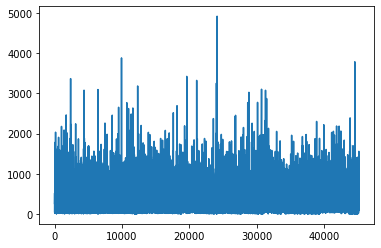

In [36]:
df.dur.plot()

In [37]:
print('Duration > 643 & yes : ', len(df[(df['dur'] > 643) & (df['y'] == 'yes')]))
print('Duration > 643 & no : ',len(df[(df['dur'] > 643) & (df['y'] == 'no')]))
print('Duration < 643 & yes : ',len(df[(df['dur'] < 643) & (df['y'] == 'yes')]))
print('Duration < 643 & no : ',len(df[(df['dur'] < 643) & (df['y'] == 'no')]))


Duration > 643 & yes :  1651
Duration > 643 & no :  1584
Duration < 643 & yes :  3636
Duration < 643 & no :  38322


## NUM_CALLS - Column

In [38]:
q1 = df.num_calls.quantile(0.25)
q3 = df.num_calls.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
print('Lower thersold : ', lower,'\n'
      'Upper thersold : ', upper)
print('count of greater than 6 calls : ', len(df[df['num_calls'] > 6]))

# Finding lower & upper threshold for iqr
# Identify'g count of who have greater than of 6-calls from "num_calls col"

Lower thersold :  -2.0 
Upper thersold :  6.0
count of greater than 6 calls :  3064


<AxesSubplot:>

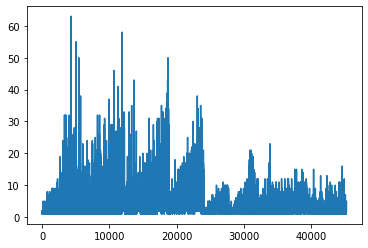

In [39]:
df.num_calls.plot()

In [40]:
print('Calls > 6 & yes : ', len(df[(df['num_calls'] > 6) & (df['y'] == 'yes')]))
print('Calls > 6 & no : ',len(df[(df['num_calls'] > 6) & (df['y'] == 'no')]))
print('Calls < 6 & yes : ',len(df[(df['num_calls'] < 6) & (df['y'] == 'yes')]))
print('Calls < 6 & no : ',len(df[(df['num_calls'] < 6) & (df['y'] == 'no')]))

Calls > 6 & yes :  161
Calls > 6 & no :  2903
Calls < 6 & yes :  5036
Calls < 6 & no :  35814


## PREVIOUS_Outcome - Column

In [41]:
df.prev_outcome.value_counts()

# Displays the count value of all result of "Prev_outcome-col"
# here Results:- (Unknown, Success, failure, other)

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [42]:
df.prev_outcome.unique()

# Display the prev-outcome unique values

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [43]:
for a in ['unknown', 'failure', 'other', 'success'] :
    print('%-conversion of Result --> ', a, ' : ', (( (len(df[(df['prev_outcome'] == a) & (df['y'] == 'yes')]))  /len(df[df['prev_outcome'] == a]) )*100 ))

# Converting all prev_outcome result(using for loop) into %

%-conversion of Result -->  unknown  :  9.162990826184613
%-conversion of Result -->  failure  :  12.609671495613139
%-conversion of Result -->  other  :  16.684782608695652
%-conversion of Result -->  success  :  64.72534745201854


## Target y - column

In [44]:
df.y.value_counts()

# displays the target y --> count of both (yes & no)

no     39916
yes     5289
Name: y, dtype: int64

In [45]:
df.to_csv('cleaned_dataset.csv')

In [46]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

#-----------------------------------------------------------------------------

# **EDA**

In [47]:
df2 = df[(df['y'] == 'yes')]

<AxesSubplot:xlabel='age', ylabel='y'>

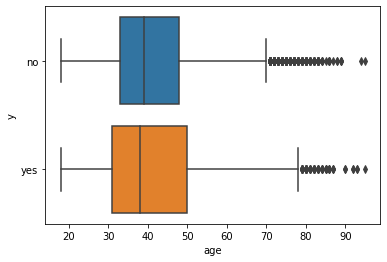

In [48]:
sns.boxplot(data = df, x = 'age', y = 'y')

### **JOB - col**
 >1. Job in df

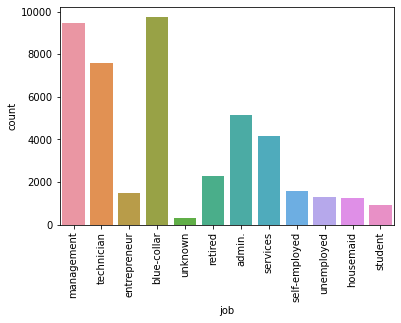

In [49]:
plot = sns.countplot(data = df, x = 'job')
plot.tick_params(axis='x',rotation=90)

>2. Job in df2

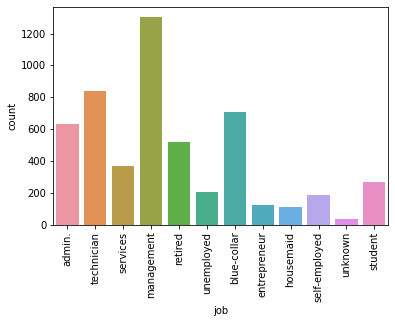

In [50]:
plot = sns.countplot(data = df2, x = 'job')
plot.tick_params(axis='x',rotation=90)

### **Marital - col**
 >1. marital in df

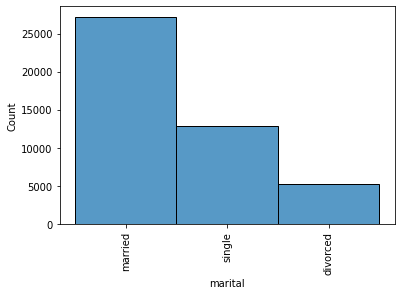

In [51]:
plot = sns.histplot(data = df, x = 'marital')
plot.tick_params(axis='x',rotation=90)


2. marital in df2

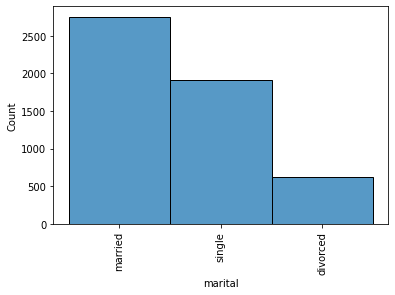

In [52]:
plot = sns.histplot(data = df2, x = 'marital')
plot.tick_params(axis='x',rotation=90)

### **Education_qual - Col**
 >1. Education_qual in df

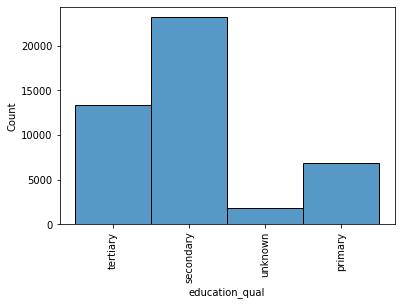

In [53]:
plot = sns.histplot(data = df, x = 'education_qual')
plot.tick_params(axis='x',rotation=90)

>2. Educational_qual in df2

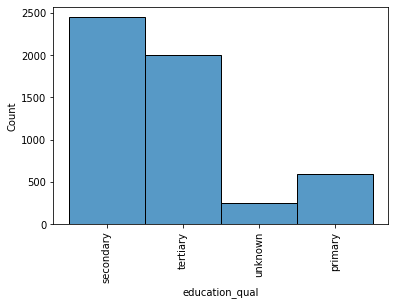

In [54]:
plot = sns.histplot(data = df2, x = 'education_qual')
plot.tick_params(axis='x',rotation=90)

### **Call_type - Col**
 >1. Call_type in df

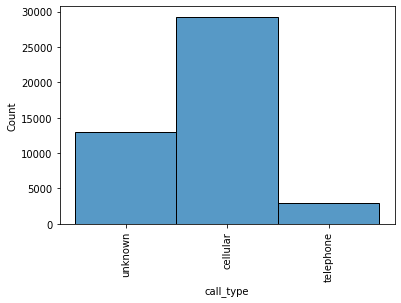

In [55]:
plot = sns.histplot(data = df, x = 'call_type')
plot.tick_params(axis='x',rotation=90)

>2. Call_type in df2

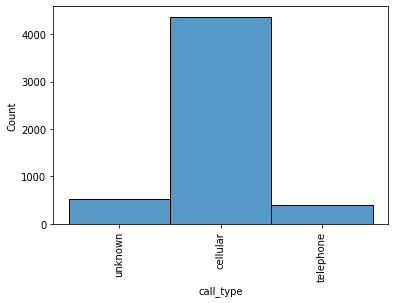

In [56]:
plot = sns.histplot(data = df2, x = 'call_type')
plot.tick_params(axis='x',rotation=90)

### **Day - Col**
 >1. day in df

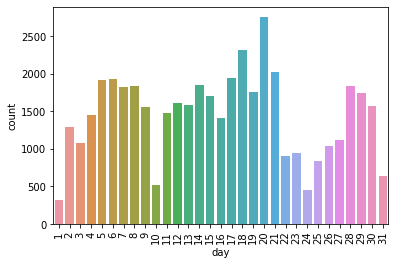

In [57]:
plot = sns.countplot(data = df, x = 'day')
plot.tick_params(axis='x',rotation=90)

>2. Day in df2

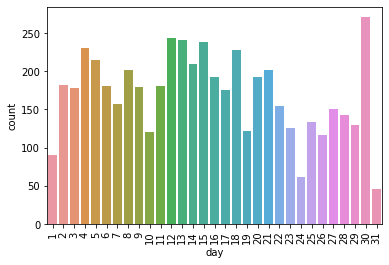

In [58]:
plot = sns.countplot(data = df2, x = 'day')
plot.tick_params(axis='x',rotation=90)

### **Mon - Col**
 >1. Month in df

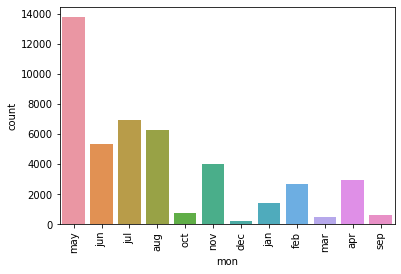

In [59]:
plot = sns.countplot(data = df, x = 'mon')
plot.tick_params(axis='x',rotation=90)

>2. Month in df2

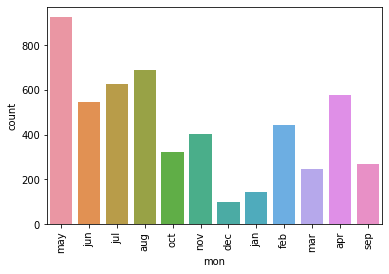

In [60]:
plot = sns.countplot(data = df2, x = 'mon')
plot.tick_params(axis='x',rotation=90)

### **Prev_outcome - Col**
 >1. Previous outcome in df

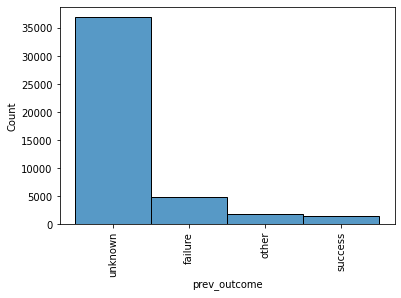

In [61]:
plot = sns.histplot(data = df, x = 'prev_outcome')
plot.tick_params(axis='x',rotation=90)

>2. Previous outcome in df2

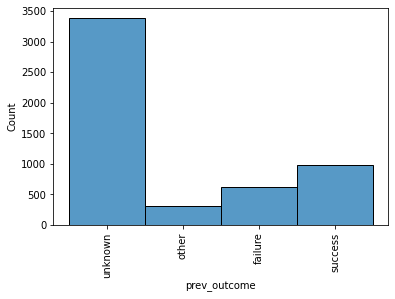

In [62]:
plot = sns.histplot(data = df2, x = 'prev_outcome')
plot.tick_params(axis='x',rotation=90)

<AxesSubplot:ylabel='Frequency'>

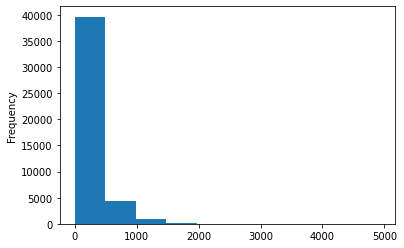

In [64]:
df.dur.plot.hist()

<AxesSubplot:ylabel='Density'>

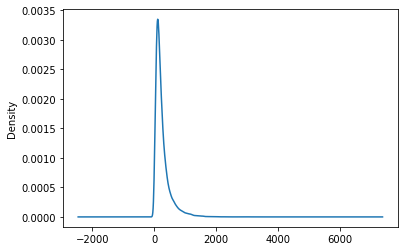

In [65]:
df.dur.plot.kde()


#-----------------------------------------------------------------------------

# **ENCODING**

In [66]:
df['job'] = df['job'].replace({'management' : 3, 'technician' : 6, 'entrepreneur' : 9, 'blue-collar' : 10,
                               'unknown' : 0, 'retired' : 1, 'admin.' : 4, 'services' : 7, 'self-employed' : 5,
                               'unemployed' : 2, 'housemaid' : 8, 'student' : 0})


df['marital'] = df['marital'].replace({'married' : 2, 'single' : 0, 'divorced' : 1})


df['education_qual'] = df['education_qual'].replace({'tertiary' : 0, 'secondary' : 1, 'primary' : 2, 'unknown' : 1})


df['call_type'] = df['call_type'].replace({'cellular' : 0, 'telephone' : 1, 'unknown' : 2})


df['mon'] = df['mon'].replace({'may' : 11,'jul' : 10, 'aug' : 6, 'jun' : 7, 'nov' : 8, 'apr' : 4, 
                               'feb' : 5, 'jan' : 9, 'oct' : 3, 'sep' : 2, 'mar' : 0, 'dec' : 1})


df['prev_outcome'] = df['prev_outcome'].replace({'success' : 0, 'failure' : 2, 'unknown' : 3, 'other' : 1})


df['y'] = df['y'].replace({'yes' : 0, 'no' : 1})

In [67]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [68]:
df.shape

(45205, 11)

#-----------------------------------------------------------------------------

# **Features & Target Variable**

In [70]:
X = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome']]

y = df['y']

In [71]:
X.shape, y.shape

((45205, 10), (45205,))

#-----------------------------------------------------------------------------

# **Splitting up DATA**

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25) 

In [73]:
X_train

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
19292,44,6,2,1,0,6,6,165,2,3
16457,53,3,1,0,1,23,10,203,2,3
31811,26,4,2,1,0,8,4,209,1,3
19643,44,6,2,1,0,7,6,159,3,3
28429,58,2,1,2,0,29,9,267,1,3
...,...,...,...,...,...,...,...,...,...,...
22503,36,3,1,0,0,22,6,247,4,3
42242,32,3,2,0,0,12,8,126,1,2
6985,33,10,2,2,2,28,11,528,2,3
42663,48,7,2,1,0,14,9,273,1,3


#-----------------------------------------------------------------------------

# **Balancing DATA**

In [74]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [75]:
X_train, y_train

(       age  job  marital  education_qual  call_type  day  mon   dur  \
 0       26    4        2               1          0    8    4   209   
 1       51   10        2               1          0   12    6  1226   
 2       23    0        0               0          0   10    6   213   
 3       68    1        2               0          0    3    6   392   
 4       48   10        2               2          0   11    6   856   
 ...    ...  ...      ...             ...        ...  ...  ...   ...   
 51689   38    6        2               1          0   17    8   224   
 51690   30    6        0               0          2   27   11   182   
 51691   36    3        1               0          0   22    6   247   
 51692   48    7        2               1          0   14    9   273   
 51693   27    4        0               1          2    9   11   371   
 
        num_calls  prev_outcome  
 0              1             3  
 1              3             3  
 2              1             3 

#-----------------------------------------------------------------------------

# **MODELLING the data**

>>## 1. Linear_Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [78]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_predict_log = log.predict(X_test)
roc_auc_score(y_test,y_predict_log)

0.8216838914141629

>>## 2.DECISION Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [80]:
for depth in range(1,15) :
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    y_predict_dt = dt.predict(X_test)
    auroc = roc_auc_score(y_test, y_predict_dt)
    print('Depth : ', depth, 'Train Score : ', dt.score(X_train, y_train), 'AUROC : ', auroc, 'Cross Validation : ', np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring = 'roc_auc')))


Depth :  1 Train Score :  0.7774596664990134 AUROC :  0.7252740632362592 Cross Validation :  0.7713138870065445
Depth :  2 Train Score :  0.8386273068441211 AUROC :  0.7508117005368304 Cross Validation :  0.8545467342468624
Depth :  3 Train Score :  0.8711842767052269 AUROC :  0.7986165422124715 Cross Validation :  0.9101079858419684
Depth :  4 Train Score :  0.8796765582079158 AUROC :  0.789518915195184 Cross Validation :  0.94107176520346
Depth :  5 Train Score :  0.9108794057337408 AUROC :  0.8208854901457429 Cross Validation :  0.9557730029904901
Depth :  6 Train Score :  0.9193329980268503 AUROC :  0.8200137110449217 Cross Validation :  0.9650303953794326
Depth :  7 Train Score :  0.9293728479127171 AUROC :  0.828488257135512 Cross Validation :  0.9701313779467682
Depth :  8 Train Score :  0.9398963129183271 AUROC :  0.832233049182809 Cross Validation :  0.9724027522238574
Depth :  9 Train Score :  0.9473826749719503 AUROC :  0.8323644095996604 Cross Validation :  0.97203872662182

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [82]:
dt = DecisionTreeClassifier(max_depth = 9)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
roc_auc_score(y_test, y_predict_dt)

0.8323141431876769

>>## 3. RANDOM Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_features = 'sqrt')
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
roc_auc_score(y_test, y_predict_rf)

0.8002111560273137

>>## 4. XGB Classifier

In [85]:
import xgboost as xgb

In [86]:
for lr in [0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    xg = xgb.XGBClassifier(learning_rate = lr, n_estimator = 100, verbosity = 0)
    xg.fit(X_train, y_train)
    y_predict_xg = xg.predict(X_test)
    auroc = roc_auc_score(y_test, y_predict_xg)
    print('Learning Rate : ', lr, 'Train Score : ', xg.score(X_train, y_train), 'AUROC : ', auroc, 'Cross Validation : ', np.mean(cross_val_score(xg, X_train, y_train, cv=10, scoring = 'roc_auc')))


Learning Rate :  0.1 Train Score :  0.9663597322706697 AUROC :  0.8541915324652393 Cross Validation :  0.9910215820608974
Learning Rate :  0.11 Train Score :  0.967810577629899 AUROC :  0.8506020283888373 Cross Validation :  0.9913080962769097
Learning Rate :  0.12 Train Score :  0.9683328819592216 AUROC :  0.8565380650287854 Cross Validation :  0.9915630818929323
Learning Rate :  0.13 Train Score :  0.9693001121987078 AUROC :  0.8497120717663394 Cross Validation :  0.9918136832231481
Learning Rate :  0.14 Train Score :  0.9716601539830542 AUROC :  0.8526126848681778 Cross Validation :  0.9921221862942822
Learning Rate :  0.15 Train Score :  0.9733431345997601 AUROC :  0.8512863193375072 Cross Validation :  0.9922765162983433
Learning Rate :  0.2 Train Score :  0.9764769605756954 AUROC :  0.8507973440044043 Cross Validation :  0.9932599767633583
Learning Rate :  0.3 Train Score :  0.9843308701203234 AUROC :  0.8485638830450835 Cross Validation :  0.9939308587221609
Learning Rate :  0.4

In [87]:
import xgboost as xgb

xg = xgb.XGBClassifier(learning_rate = 0.9, n_estimator = 100, verbosity = 0)
xg.fit(X_train, y_train)
y_predict_xg = xg.predict(X_test)
roc_auc_score(y_test, y_predict_xg)

0.8385116393639054

>>## 5.Voting Classifier

In [88]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [89]:
model1 =DecisionTreeClassifier(max_depth = 9)
model2 = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_features = 'sqrt')
model3 = xgb.XGBClassifier(learning_rate = 0.5, n_estimator = 100, verbosity = 0)

model = VotingClassifier(estimators=[('Decision Tree : ', model1), ('Random Forest : ', model2),('XGBoost : ',model3)]) 

model.fit(X_train, y_train)
y_predict_voting = model.predict(X_test)
roc_auc_score(y_test, y_predict_voting)

0.8463990886013213

#-----------------------------------------------------------------------------

# **AUROC** prediction comparision

In [90]:
AUROC = pd.Series({'XGBoost' : (roc_auc_score(y_test, y_predict_xg)),
                   'Voting Classifier' : (roc_auc_score(y_test, y_predict_voting)),
                   'Decision Tree' : (roc_auc_score(y_test, y_predict_dt)),
                   'Random Forest' : (roc_auc_score(y_test, y_predict_rf)),
                   'Logistic Regression' : (roc_auc_score(y_test,y_predict_log))})
AUROC

XGBoost                0.838512
Voting Classifier      0.846399
Decision Tree          0.832314
Random Forest          0.800211
Logistic Regression    0.821684
dtype: float64

All format of modelling has moreover same accuracy of **80 & above** --> [Which is (decent)good fit for above model]

#-----------------------------------------------------------------------------

# **Important Features**

In [91]:
importances = list((xg.feature_importances_)*100)


feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]


feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

 
[print('{:15} - {}'.format(*pair)) for pair in feature_importances];

call_type       - 40.66999816894531
prev_outcome    - 18.93000030517578
mon             - 11.479999542236328
dur             - 9.850000381469727
marital         - 4.340000152587891
education_qual  - 4.329999923706055
job             - 3.619999885559082
num_calls       - 2.7300000190734863
day             - 2.4200000762939453
age             - 1.6299999952316284


#-------------------------------Thank you..!-------------------------------